In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 23.7MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.1MB/s]


In [6]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [10]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 4s 0us/step


In [11]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [12]:
model=Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
conv_base.trainable=False

In [23]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array, load_img

In [24]:
batch_size=32

train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator =train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator=train_datagen.flow_from_directory(
    '/content/test',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history=model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

<ipython-input-26-6fc81acd51cf>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/10
625/625 [==============================] - 188s 299ms/step - loss: 0.2103 - accuracy: 0.9148 - val_loss: 0.2604 - val_accuracy: 0.8940
Epoch 2/10
625/625 [==============================] - 187s 298ms/step - loss: 0.1821 - accuracy: 0.9255 - val_loss: 0.2475 - val_accuracy: 0.8968
Epoch 3/10
625/625 [==============================] - 185s 295ms/step - loss: 0.1669 - accuracy: 0.9318 - val_loss: 0.2447 - val_accuracy: 0.8974
Epoch 4/10
625/625 [==============================] - 190s 305ms/step - loss: 0.1581 - accuracy: 0.9344 - val_loss: 0.2336 - val_accuracy: 0.9054
Epoch 5/10
625/625 [==============================] - 188s 300ms/step - loss: 0.1483 - accuracy: 0.9388 - val_loss: 0.2300 - val_accuracy: 0.9068
Epoch 6/10
625/625 [==============================] - 188s 301ms/step - loss: 0.1379 - accuracy: 0.9453 - val_loss: 0.3059 - val_accuracy: 0.8808
Epoch 7/10
625/625 [==============================] - 189s 302ms/step - loss: 0.1375 - accuracy: 0.9428 - val_loss: 0.2221 -

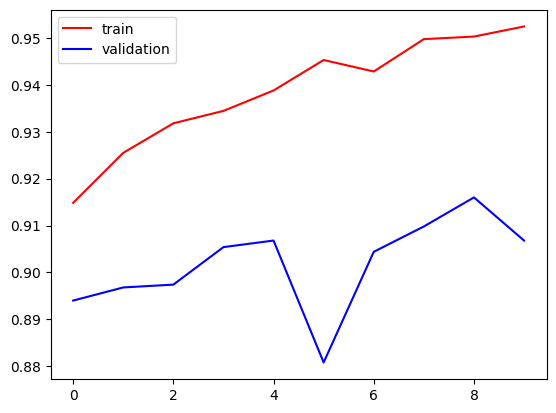

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

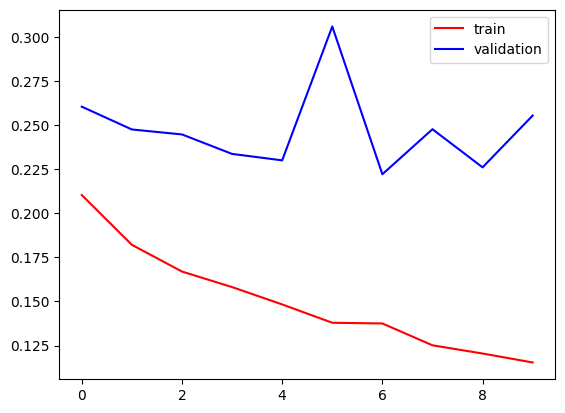

In [28]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()